# CS4035 - Cyber Data Analytics
## Lab 2 

## Group Number : 21

## Student 1 
### Name : Krzysztof Baran
### ID :

## Student 2
### Name : Michał Okoń
### ID :

In [103]:
import os
import pandas as pd
import numpy as np
import tensorflow_data_validation as tfdv
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf

## 0. Data Loading

#### Loading into pandas dataframe

In [6]:
train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
val_data_path = os.path.join(os.getcwd(), "data", "val_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
val_data_df = pd.read_csv(val_data_path)
val_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

#### Load the data inside tensorflow data validation

In [7]:
train_stats = tfdv.generate_statistics_from_csv(train_data_path, delimiter=',')
val_stats = tfdv.generate_statistics_from_csv(val_data_path, delimiter=',')
test_stats = tfdv.generate_statistics_from_csv(test_data_path, delimiter=',')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


#### Data representations

**Train Data**

In [8]:
train_data_df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
Id,,,,,,,,,,,,,,,,,,,,,
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1,0
496796,28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,0
496797,28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,0


In [9]:
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Id',INT,required,,-
'Timestamp',BYTES,required,,-
'FIT101',FLOAT,required,,-
'LIT101',FLOAT,required,,-
'MV101',INT,required,,-
'P101',INT,required,,-
'P102',INT,required,,-
'AIT201',FLOAT,required,,-
'AIT202',FLOAT,required,,-


**Validation Data**

In [10]:
val_data_df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
Id,,,,,,,,,,,,,,,,,,,,,
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224954,31/12/2015 12:29:14 AM,2.643244,519.4318,2,2,1,192.2263,8.527493,324.0707,2.445007,...,2,1,249.7116,0.816967,188.4613,0.000000,1,1,1,0
224955,31/12/2015 12:29:15 AM,2.667585,518.8037,2,2,1,192.2263,8.527493,324.0707,2.445007,...,2,1,249.7116,0.816967,188.4613,0.000000,1,1,1,0
224956,31/12/2015 12:29:16 AM,2.670147,518.6467,2,2,1,192.2263,8.527493,324.0707,2.445007,...,2,1,249.7116,0.816967,188.4613,0.000000,1,1,1,0


**Test Data**

In [12]:
test_data_df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Id,,,,,,,,,,,,,,,,,,,,,
224959,31/12/2015 12:29:19 AM,2.612177,517.6261,2,2,1,192.2263,8.530376,324.2758,2.443597,...,0.306825,2,1,250.0000,0.816967,188.4613,0.0,1,1,1
224960,31/12/2015 12:29:20 AM,2.612177,517.7831,2,2,1,192.2263,8.531017,324.2758,2.443597,...,0.306441,2,1,250.0000,0.816967,188.4613,0.0,1,1,1
224961,31/12/2015 12:29:21 AM,2.594562,518.2149,2,2,1,192.2263,8.531017,324.2758,2.443597,...,0.306441,2,1,249.9840,0.816967,188.4613,0.0,1,1,1
224962,31/12/2015 12:29:22 AM,2.577907,518.7645,2,2,1,192.2263,8.531017,324.2758,2.442060,...,0.306441,2,1,249.7597,0.816967,188.4613,0.0,1,1,1
224963,31/12/2015 12:29:23 AM,2.562854,519.1177,2,2,1,192.2263,8.531017,324.2758,2.441419,...,0.306441,2,1,249.7597,0.816967,188.4613,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.306569,2,1,251.1535,0.865024,189.0220,0.0,1,1,1
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.306569,2,1,251.0734,0.865024,188.9259,0.0,1,1,1
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,0.306569,2,1,251.0734,0.865024,188.9259,0.0,1,1,1


**Train VS. Test Data**

In [13]:
tfdv.visualize_statistics(
    lhs_statistics=train_stats,
    rhs_statistics=test_stats,
    lhs_name='TRAIN_DATASET',
    rhs_name='TEST_DATASET'
)

**Train VS. Validation Data**

In [14]:
tfdv.visualize_statistics(
    lhs_statistics=train_stats,
    rhs_statistics=val_stats,
    lhs_name='TRAIN_DATASET',
    rhs_name='VALIDATION_DATASET'
)

## 1. Familiarization task

### 1a. Plot visualizations 

In [17]:
train_data_df.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Label'],
      dtype='object')

In [31]:
SENSOR_ATTRIBUTES = [
    'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203',
    'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401',
    'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502',
    'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
    'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601'
]

ACTUATOR_ATTRIBUTES = [
    'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202',
    'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302',
    'MV303', 'MV304', 'P301', 'P302', 'P401',
    'P402', 'P403', 'P404', 'UV401', 'P501', 'P502',
    'P601', 'P602', 'P603'
]

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
train_data_df[SENSOR_ATTRIBUTES]

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,AIT402,FIT401,LIT401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601
Id,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.470294,261.5804,244.3284,8.190080,306.1010,2.471278,20.79839,2.235275,327.4401,0.000,171.0587,0.000000,238.0544,7.308575,176.8265,263.6504,12.68905,0.001666,0.001409,0.001664,0.000000,10.02948,0.000000,4.277749,0.000256
1,2.457163,261.1879,244.3284,8.190080,306.1010,2.468587,20.79839,2.234507,327.4401,0.000,171.0587,0.000000,238.1312,7.308575,176.8008,263.6504,12.68905,0.001666,0.001409,0.001664,0.000000,10.02948,0.000000,4.277749,0.000256
2,2.439548,260.9131,244.3284,8.190080,306.1010,2.467305,20.84320,2.233354,327.4401,0.000,171.0587,0.000000,238.0544,7.308575,176.8008,263.6504,12.68905,0.001666,0.001409,0.001664,0.000000,10.02948,0.000000,4.277749,0.000256
3,2.428338,260.2850,244.3284,8.190080,306.1010,2.466536,20.84320,2.233354,327.2799,0.000,171.0587,0.000000,238.2081,7.308575,176.8008,263.6504,12.68905,0.001666,0.001409,0.001664,0.000000,10.02948,0.000000,4.277749,0.000256
4,2.424815,259.8925,244.4245,8.190080,306.1010,2.466536,20.84320,2.233354,327.1597,0.000,171.0587,0.000000,238.4389,7.308575,176.8008,263.6504,12.68905,0.001666,0.001409,0.001664,0.000000,10.02948,0.000000,4.277749,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2.460366,523.0430,262.0161,8.396437,328.5055,2.442316,19.74838,2.212087,955.8046,148.808,156.0882,1.715439,941.8354,7.878621,145.2704,264.5475,12.03538,1.726352,1.292430,0.735269,0.308619,250.81710,1.778105,189.855200,0.000128
496796,2.448836,522.9645,262.0161,8.396437,328.5055,2.442316,19.74838,2.210037,955.8847,148.808,156.0882,1.715439,941.9893,7.878621,145.2704,264.5475,12.03538,1.724942,1.281158,0.735269,0.308619,250.81710,1.778105,189.502700,0.000128
496797,2.434744,522.8860,262.0161,8.396437,328.6337,2.444879,19.74838,2.207731,955.9648,148.808,156.0882,1.715439,942.1815,7.878621,145.2704,264.5475,12.03538,1.723789,1.272576,0.735269,0.308619,250.81710,1.778105,189.502700,0.000128


In [34]:
train_data_df[ACTUATOR_ATTRIBUTES]

,MV101,P101,P102,MV201,P201,P202,P203,P204,P205,P206,MV301,MV302,MV303,MV304,P301,P302,P401,P402,P403,P404,UV401,P501,P502,P601,P602,P603
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2,1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
1,2,2,1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
2,2,2,1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,2,2,1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
4,2,2,1,2,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2,2,1,2,1,1,2,1,2,1,1,2,1,1,1,2,1,2,1,1,2,2,1,1,1,1
496796,2,2,1,2,1,1,2,1,2,1,1,2,1,1,1,2,1,2,1,1,2,2,1,1,1,1
496797,2,2,1,2,1,1,2,1,2,1,1,2,1,1,1,2,1,2,1,1,2,2,1,1,1,1


In [43]:
print("Unique values per column")
for col in pd.concat([train_data_df[ACTUATOR_ATTRIBUTES], val_data_df[ACTUATOR_ATTRIBUTES], test_data_df[ACTUATOR_ATTRIBUTES]], axis=0):
    print(f'{col:5s} : {sorted(train_data_df[col].unique())}')

Unique values per column
MV101 : [0, 1, 2]
P101  : [1, 2]
P102  : [1]
MV201 : [0, 1, 2]
P201  : [1]
P202  : [1]
P203  : [1, 2]
P204  : [1]
P205  : [1, 2]
P206  : [1]
MV301 : [0, 1, 2]
MV302 : [0, 1, 2]
MV303 : [0, 1, 2]
MV304 : [0, 1, 2]
P301  : [1, 2]
P302  : [1, 2]
P401  : [1]
P402  : [1, 2]
P403  : [1]
P404  : [1]
UV401 : [1, 2]
P501  : [1, 2]
P502  : [1]
P601  : [1]
P602  : [1, 2]
P603  : [1]


**Plots for P1 sub-system**

In [72]:
day_in_sec = 24 * 60 * 60

timestamps_arr = np.arange(len(train_data_df[["Timestamp"]].to_numpy()[:day_in_sec]))

fit_sensor_arr = train_data_df[["FIT101"]].to_numpy()[:day_in_sec]
lit_sensor_arr = train_data_df[["LIT101"]].to_numpy()[:day_in_sec]

mv_actuator_arr = train_data_df[["MV101"]].to_numpy()[:day_in_sec]
p1_actuator_arr = train_data_df[["P101"]].to_numpy()[:day_in_sec]
p2_actuator_arr = train_data_df[["P102"]].to_numpy()[:day_in_sec]

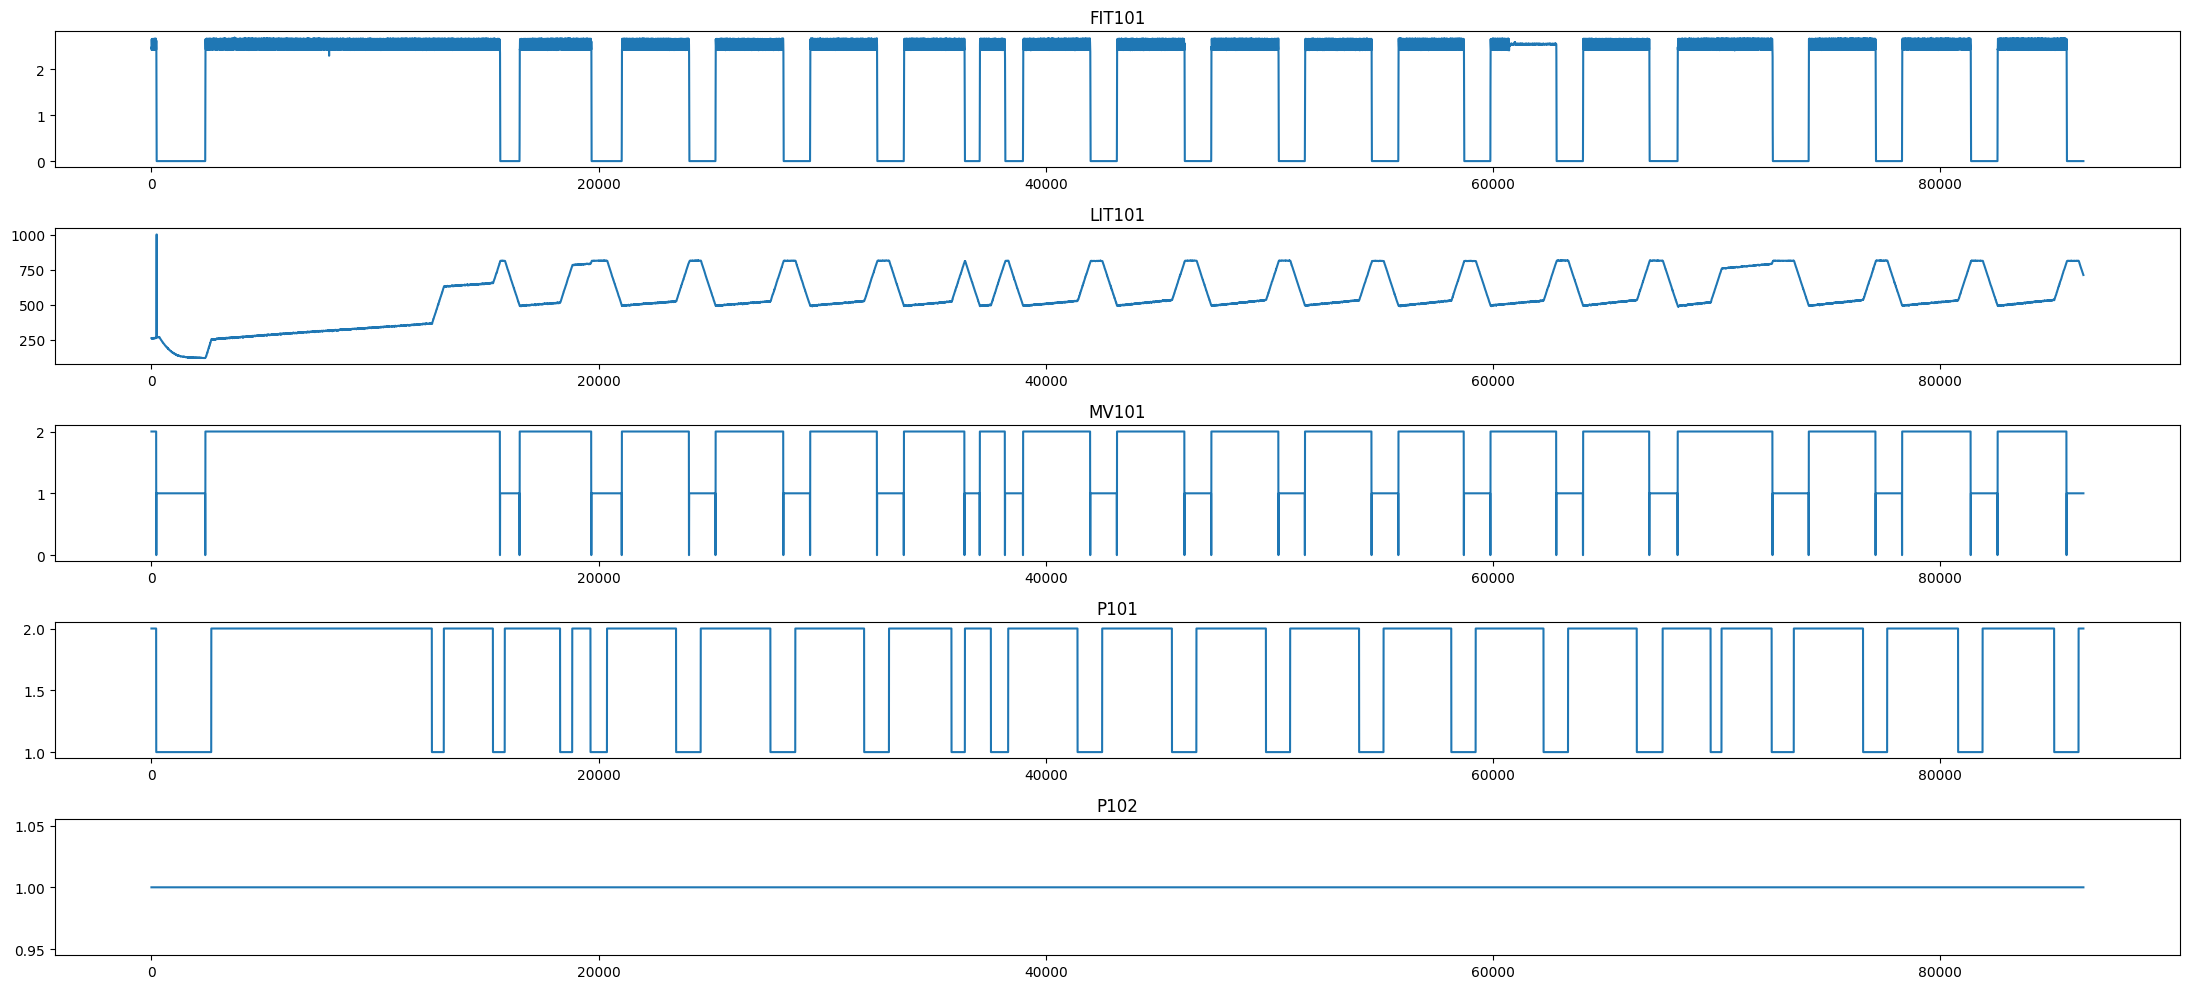

In [74]:
fig, axis = plt.subplots(5, figsize=(22, 10))

axis[0].plot(timestamps_arr, fit_sensor_arr)
axis[0].set_title("FIT101")

axis[1].plot(timestamps_arr, lit_sensor_arr)
axis[1].set_title("LIT101")

axis[2].plot(timestamps_arr, mv_actuator_arr)
axis[2].set_title("MV101")

axis[3].plot(timestamps_arr, p1_actuator_arr)
axis[3].set_title("P101")

axis[4].plot(timestamps_arr, p2_actuator_arr)
axis[4].set_title("P102")

fig.tight_layout()
plt.show()

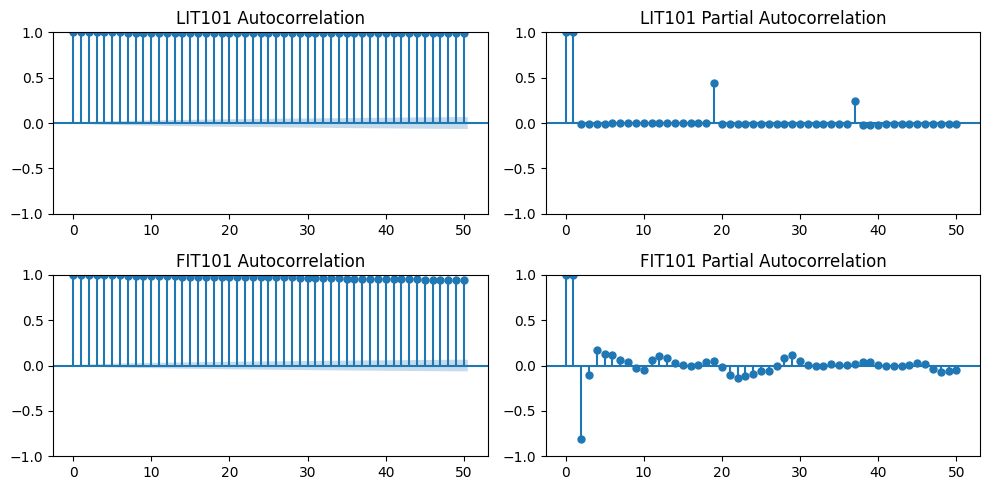

In [93]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
plot_acf(lit_sensor_arr, ax=ax[0, 0], title="LIT101 Autocorrelation")
plot_pacf(lit_sensor_arr, ax=ax[0, 1], title="LIT101 Partial Autocorrelation")
plot_acf(fit_sensor_arr, ax=ax[1, 0], title="FIT101 Autocorrelation")
plot_pacf(fit_sensor_arr, ax=ax[1, 1], title="FIT101 Partial Autocorrelation")
fig.tight_layout()
plt.show()

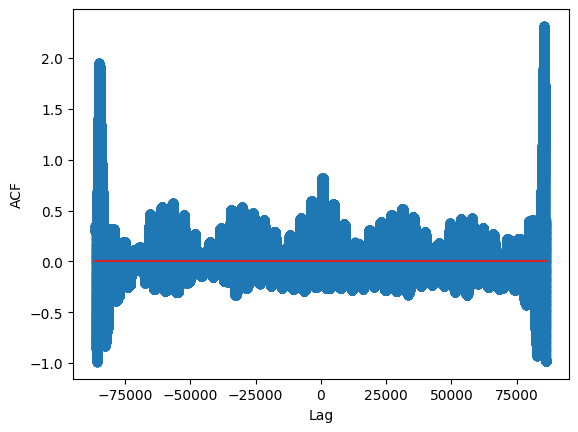

In [104]:
backwards = ccf(p1_actuator_arr, fit_sensor_arr)[::-1]
forwards = ccf(fit_sensor_arr, p1_actuator_arr)
ccf_output = np.r_[backwards[:-1], forwards]

plt.stem(range(-len(ccf_output)//2, len(ccf_output)//2), ccf_output)
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.axhline(-1.96/np.sqrt(len(fit_sensor_arr)), color='k', ls='-', linewidth=0.01)
plt.axhline(1.96/np.sqrt(len(fit_sensor_arr)), color='k', ls='-', linewidth=0.01)
plt.show()

### 1b. Answers to the three questions

The data presented is a collection of simulated data points from a Secure Water Treatment (SWaT) testbed for 11-days experiment (7 days normal operation and 4 days with cyber and physical attacks). The experiment started on `22/12/2015` at `4:00:00 PM` and ended on `2/1/2016` at `2:59:59 PM` where the train set's last timestamp is on `28/12/2015` at `9:59:59 AM` (around when the 7-day mark finishes).

The data contains 51 signals of which there are 25 sensor values (represented as floating points) that take measurements and 26 actuator values (represented as integers) which represent states of the actuators which is defined within a limited number of integers. Each of these components have a prefix indicating a component, a digit indiacting at what stage the SWaT testbed comonent is (1-6) and two digits for an identifier.

For the sensors, the prefixes there are:
- FIT: Flow meter
- LIT: Level Transmitter
- AIT: Conductivity analyzer, pH analyzer, ORP analyzer
- DPIT: Differential pressure indicating transmitter
- PIT: Pressure meter

For the actuators, the prefixes there are:
- MV: Motorized valve
- P: Pump
- DP: Dosing pump
- UV: Dechlorinator

As we can see from the figues from system P1, that the signals are correlated. On the diagram, we can observe same oscillations between the sensors and actuators. On top of that, we have a positive autocorrelation at some lags which indicates a cyclic pattern in the data. Also, after performing cross-correlation analysis, we can see that FIT101 and P101 show cyclic behaviour.

## 6.Comparision task 1 A4

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.